In [24]:
#Intial Imports
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
# Reading in dataframe
snp500_pci_marketcap_df = pd.read_csv('../Group3Project1/Resources/snp500_pci_marketcap.csv')

# Prepare and Clean dataframe
# Replacing $s and commas in Market capitalization,\xa0 is non breaking space that csv contains
# it prevent warping or line breaking of the column
snp500_pci_marketcap_df['Market Capitalization'] = snp500_pci_marketcap_df[
    '\xa0Market Capitalization\xa0'].replace('[\$,]', '', regex=True).astype(float)

# Renaming column 2021_pci to PCI for when displayed on bar chart
snp500_pci_marketcap_df.rename(columns={'2021_pci': 'PCI'}, inplace=True)

In [26]:
# Define function to create a bar chart for given sectors
def snp500_pci_marketcap_barchart(data, sector):
    # Filter for rows where the 'GICS Sector' matches the for loop's sector and 'PCI' is not NA
    sector_data = data[(data['GICS Sector'] == sector) & (data['PCI'].notna())]
    # Sort filtered dataframe by 'Market Capitalization' in descending order
    sector_data = sector_data.sort_values(by='Market Capitalization', ascending=False)

    # Initialize a figure with size for the bar chart
    plt.figure(figsize=(15, 8))
    # Define the width of the bars and the x positions of the group of bars
    bar_width = 0.2
    r1 = range(len(sector_data))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]

    # Create the bar plots for 'Market Capitalization', 'PCI', and 'population'.
    bars1 = plt.bar(r1, sector_data['Market Capitalization'], width=bar_width, label='Market Cap')
    bars2 = plt.bar(r2, sector_data['PCI'], width=bar_width, label='PCI')
    bars3 = plt.bar(r3, sector_data['population'], width=bar_width, label='Population')

    # Loop over the bars to place city labels on each bar.
    for bars in [bars1, bars2, bars3]:
        for bar, (_, row) in zip(bars, sector_data.iterrows()):
            y_value = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, y_value, row['city'],
                   rotation=90, verticalalignment='bottom', fontsize=7, ha='center')
    # Set the x-axis and y-axis labels and the chart title
    plt.xlabel('Company')
    plt.ylabel('Value (Log Scale)')
    plt.title(f'Sector Analysis for {sector} - Market Cap, PCI, and Population (Log Scale)')
    
    # Define the position and label of the ticks on the x-axis
    plt.xticks([r + bar_width for r in range(len(sector_data))], sector_data['Symbol'], rotation=90)
    # Set the y-axis to log scale
    plt.yscale('log')
    # Display Legend
    plt.legend()
    #Set layout to ensure the chart fits in the figure's area
    plt.tight_layout()
    plt.show()

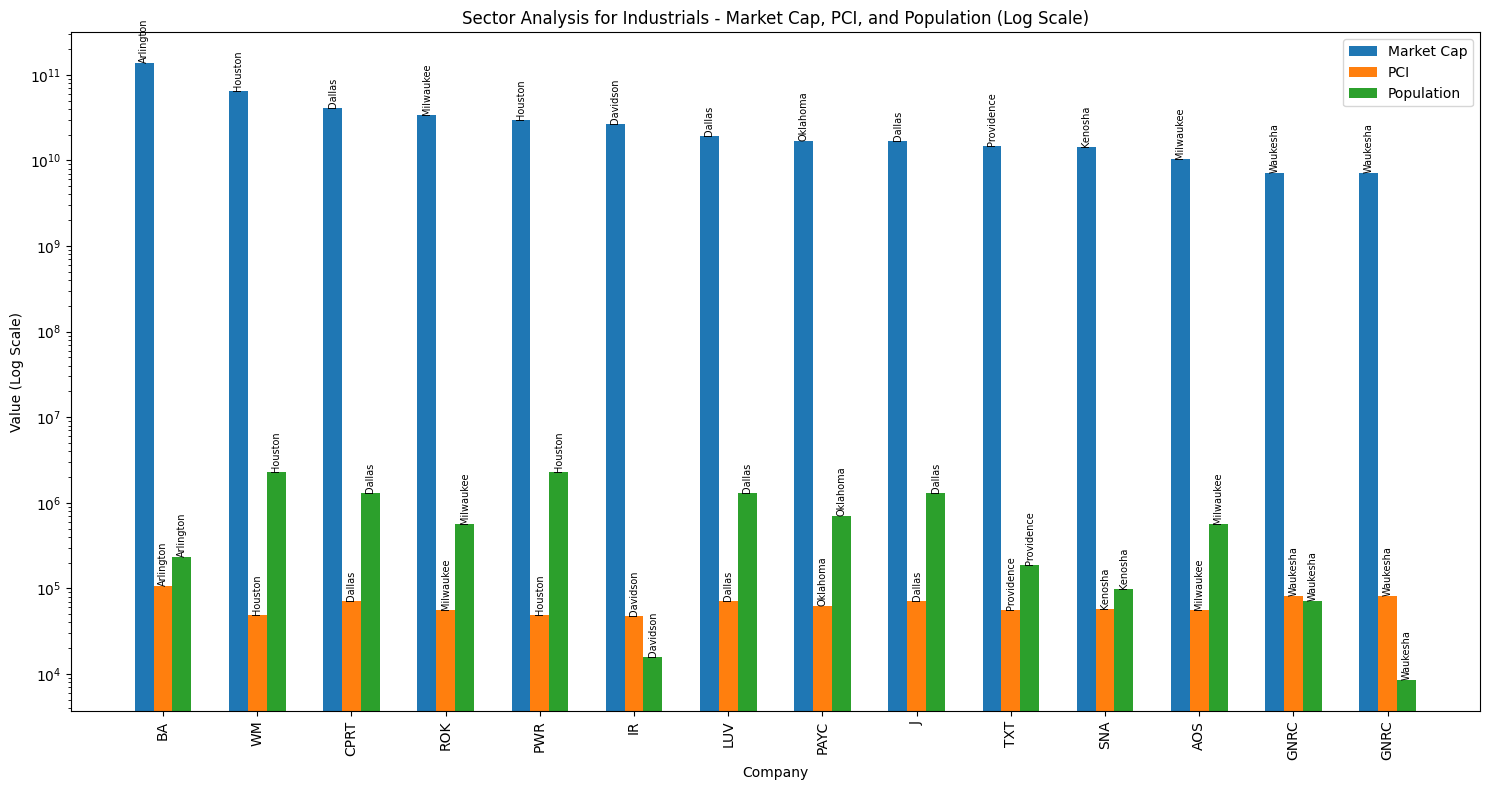

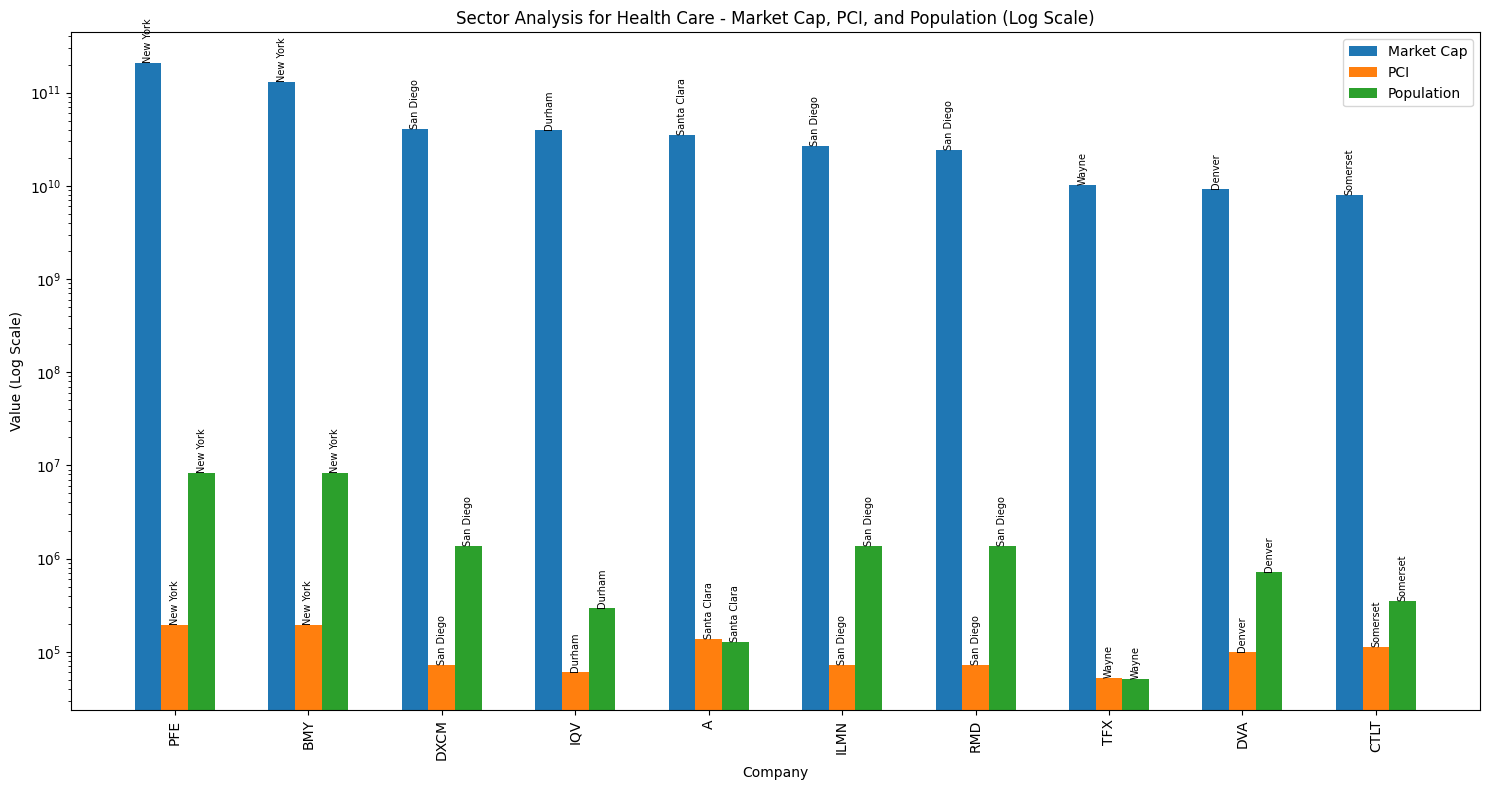

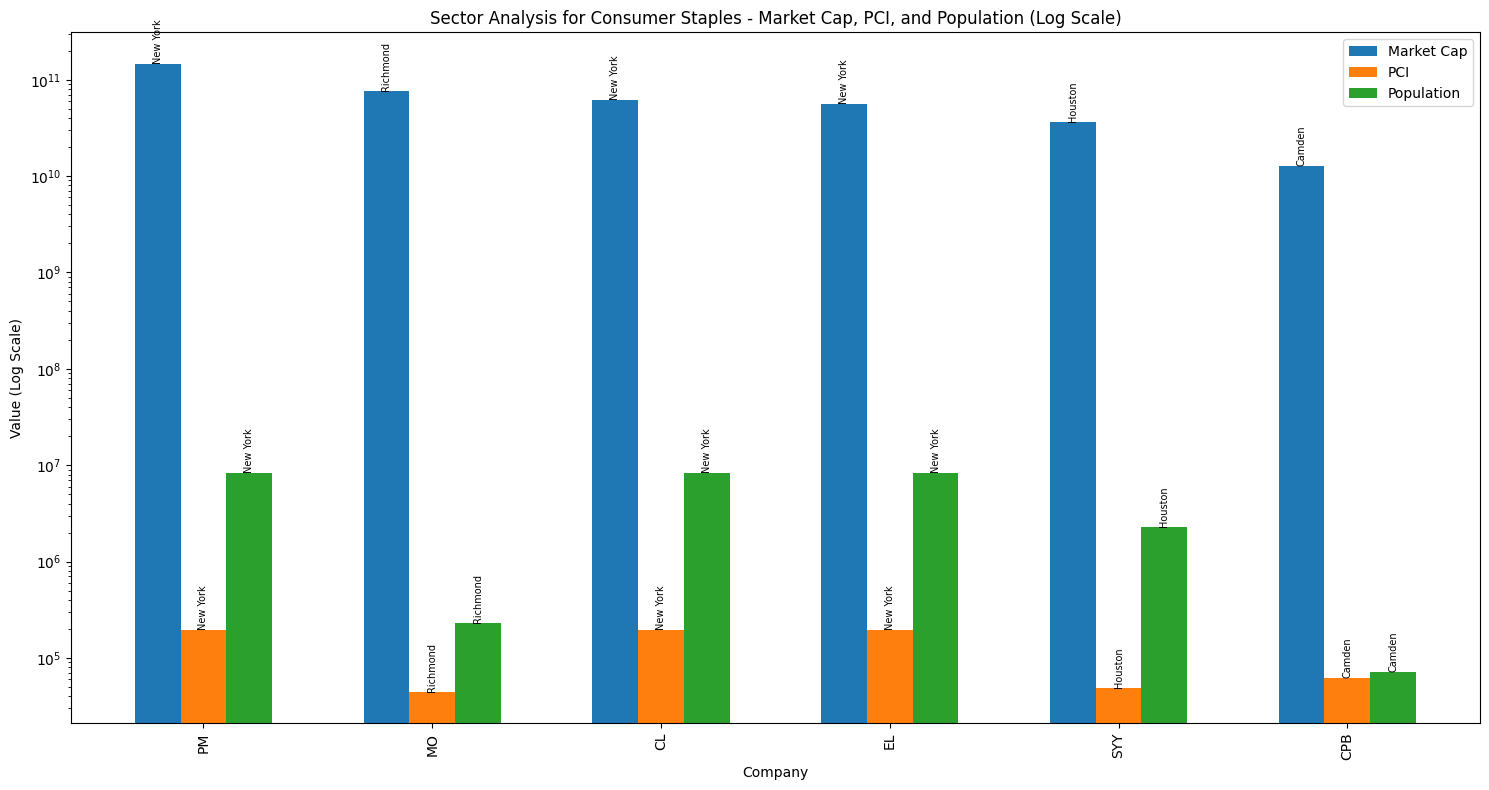

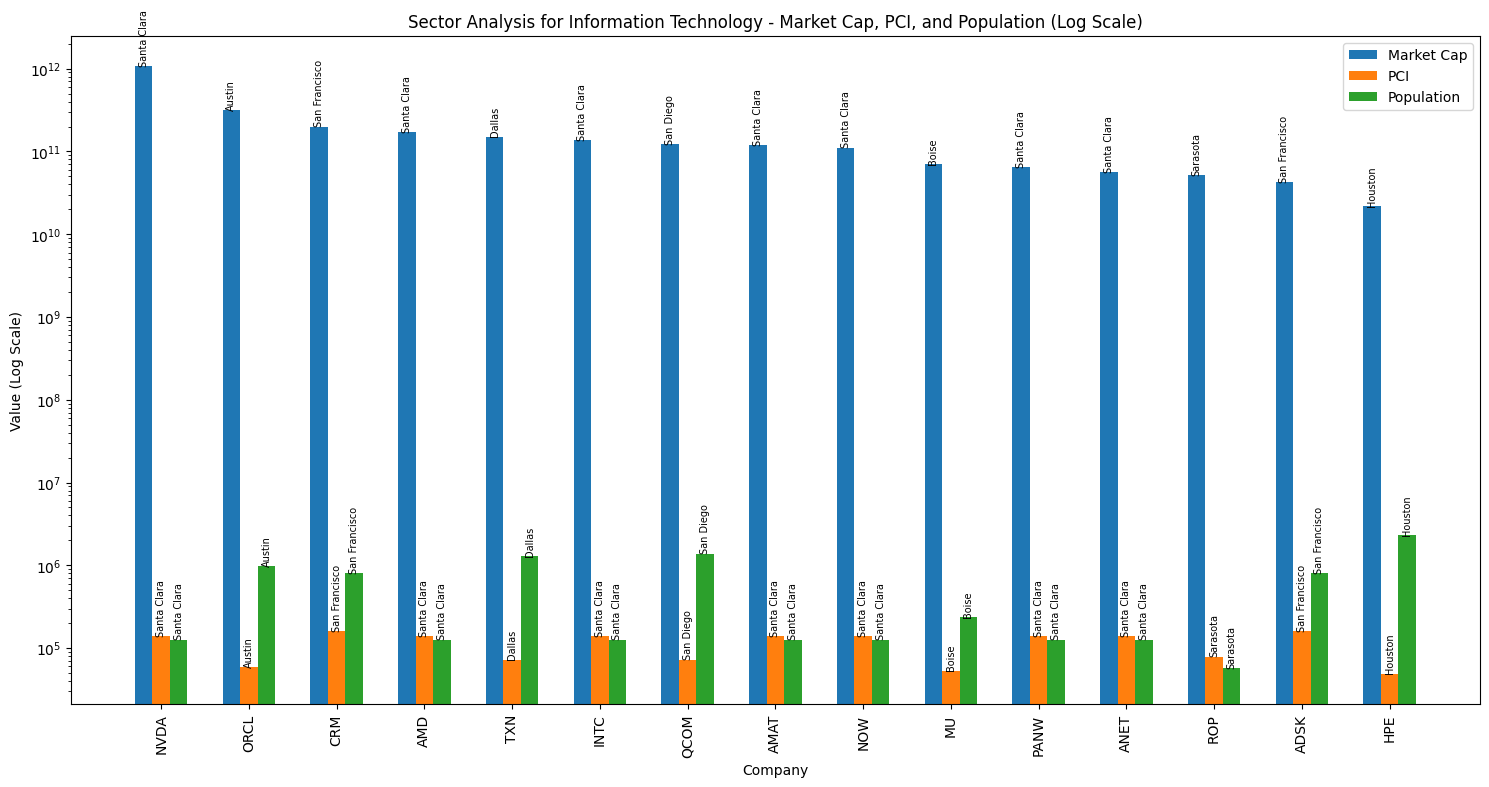

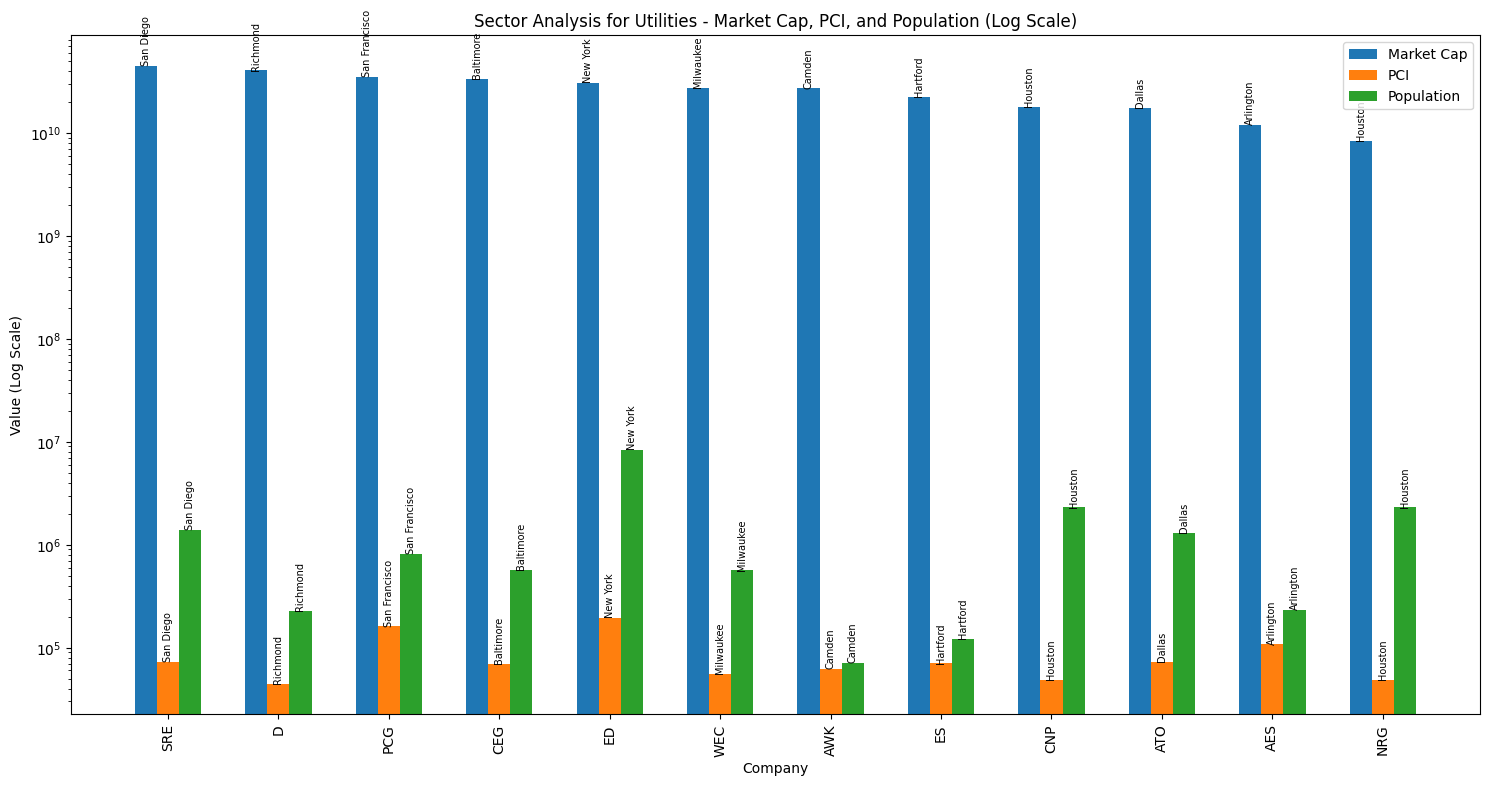

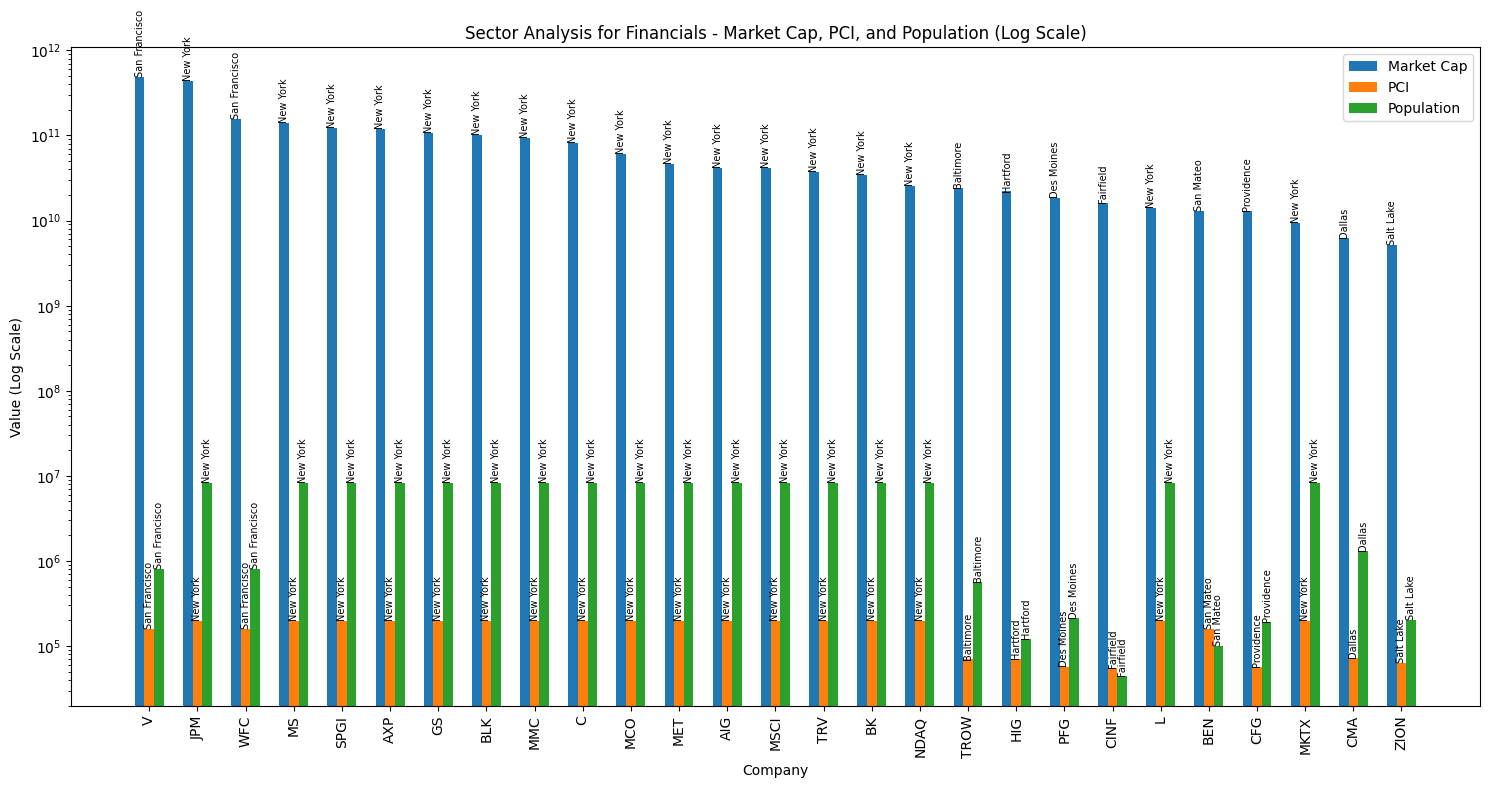

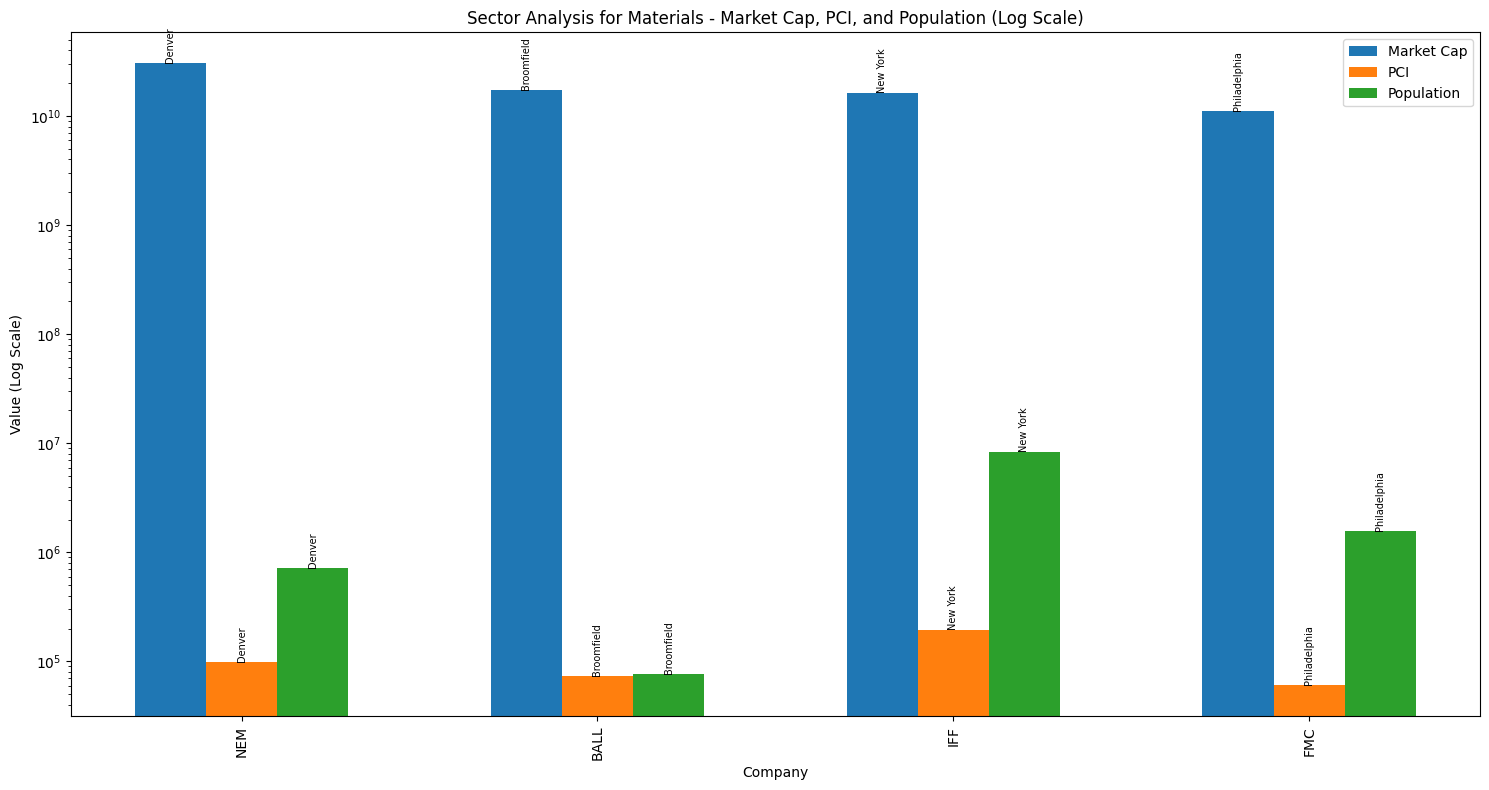

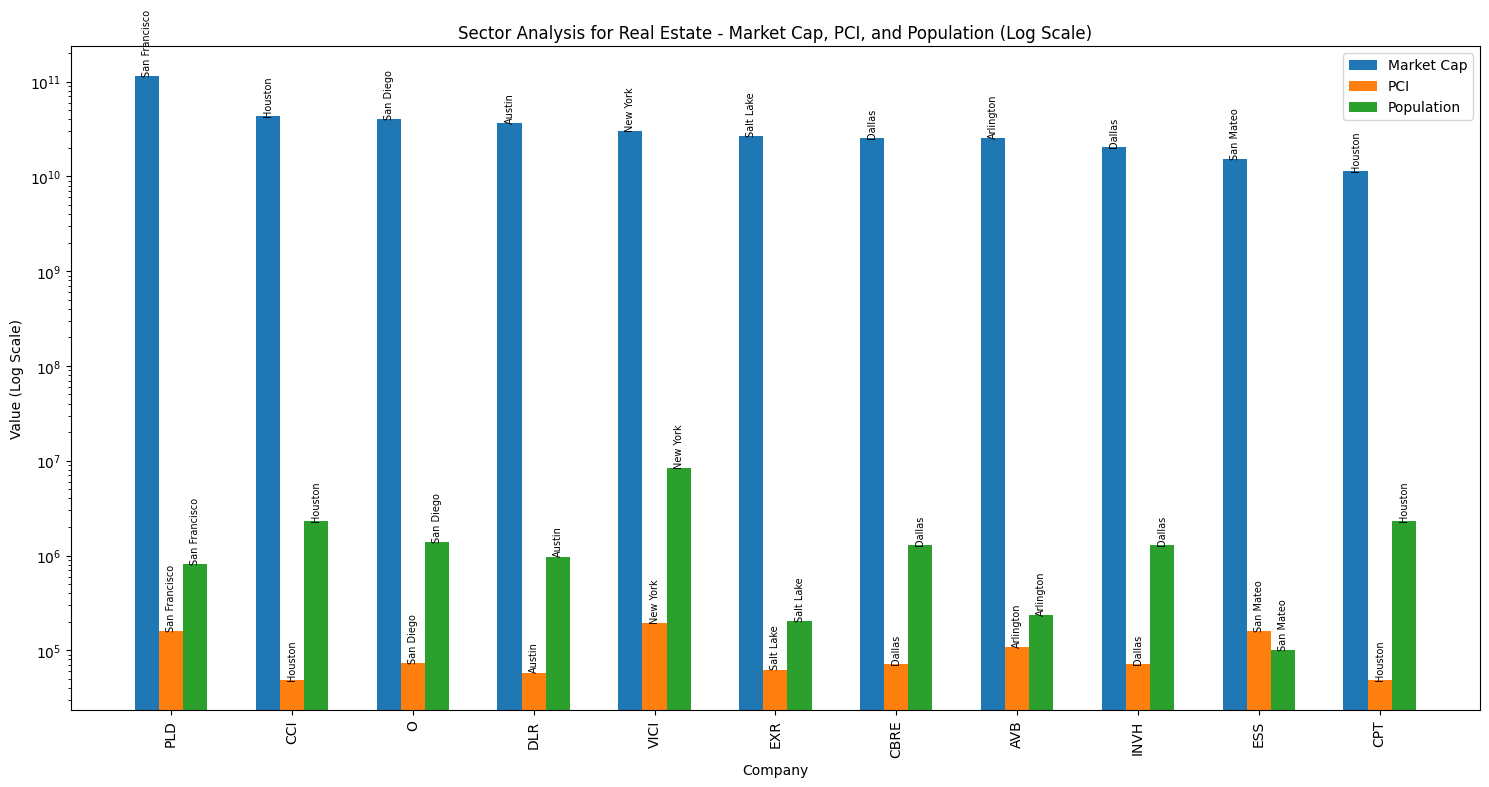

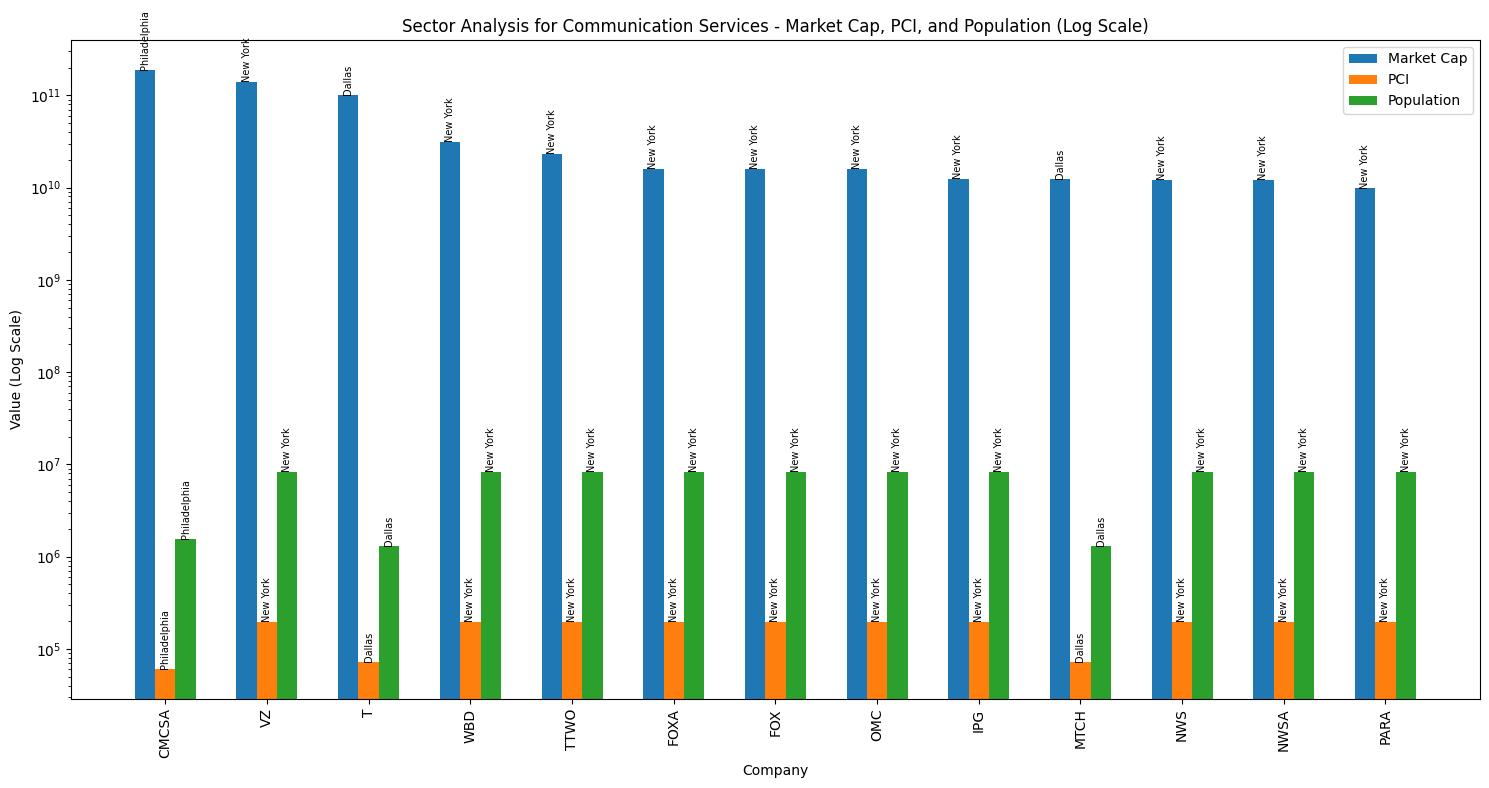

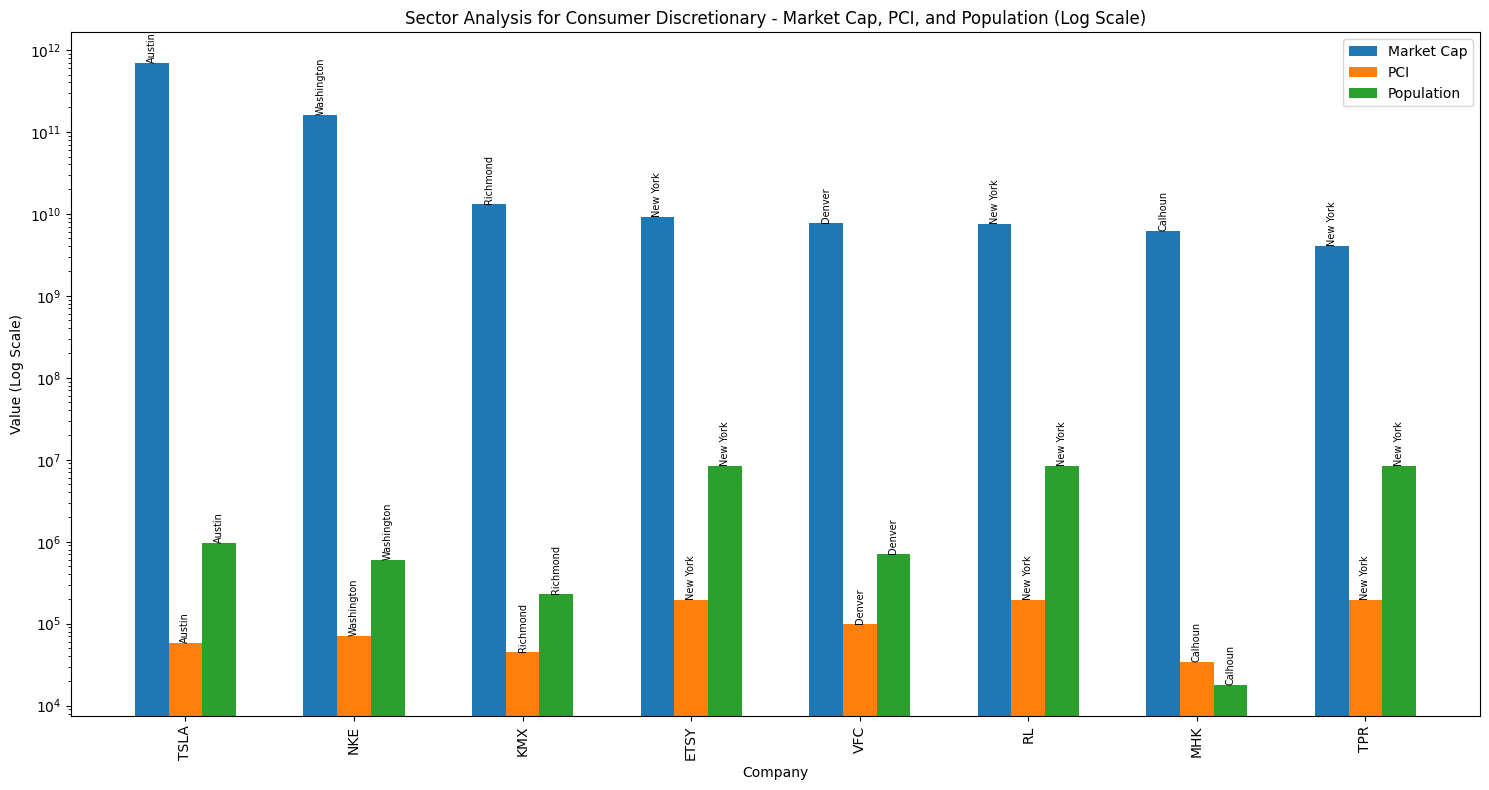

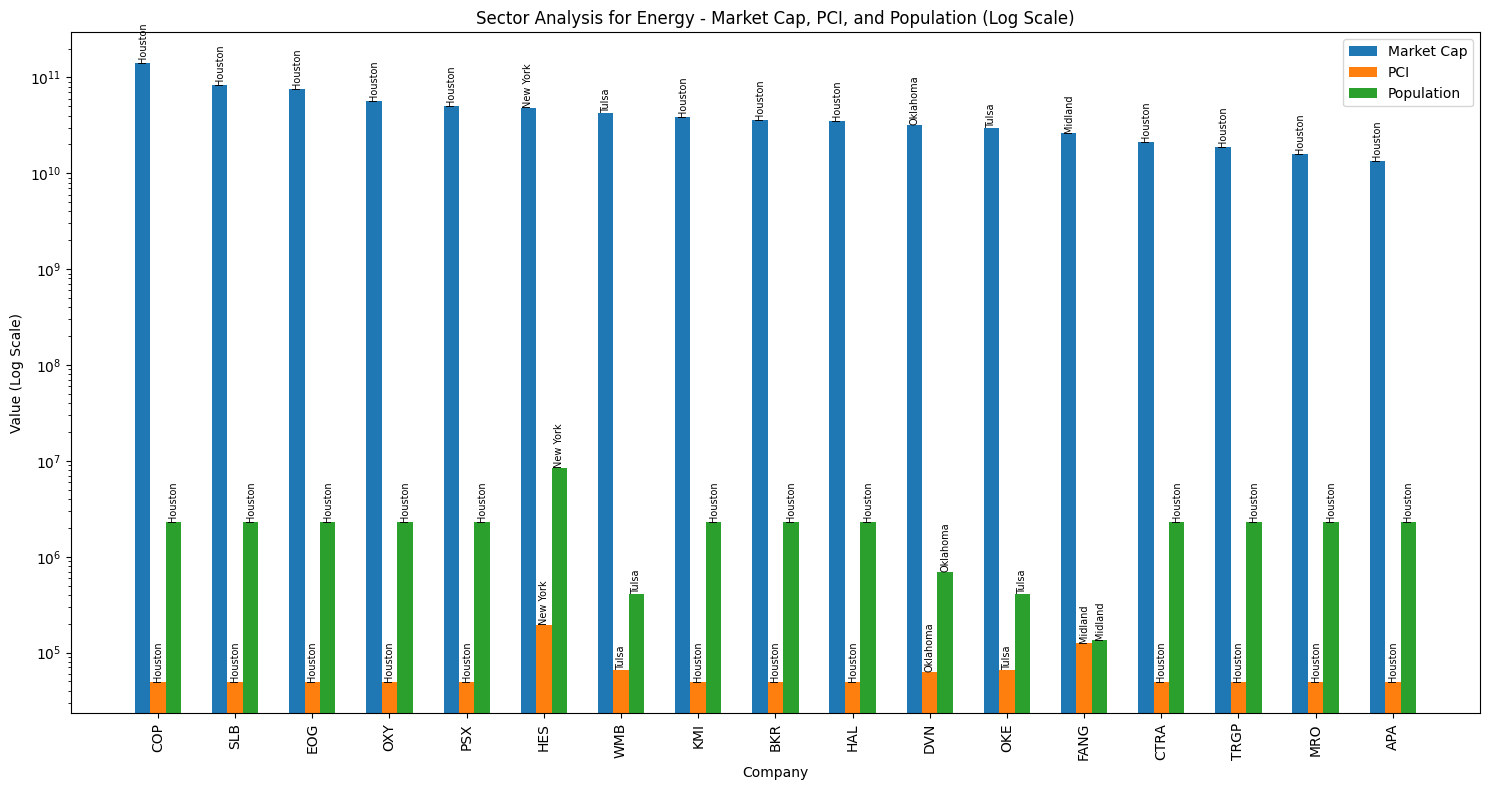

In [27]:
# For Loop bar chart function for each sector
for sector in snp500_pci_marketcap_df['GICS Sector'].unique():
    snp500_pci_marketcap_barchart(snp500_pci_marketcap_df, sector)